# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [12]:
import pandas as pd
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#Reading the csv file into a dataframe
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
folder_name = 'images'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Make a path to the file and write to it
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [4]:
# Reading the tsv file into a dataframe
image_df = pd.read_csv("images/image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=False, compression=True)

In [7]:
id = archive_df['tweet_id']
tweet_list = []
id_errors = []

for number in id:
    try:
        tweet_text = api.get_status(number, tweet_mode='extended')._json
        tweet_list.append({'tweet_id':tweet_text['id'],
                           'favorite_count':tweet_text['favorite_count'],
                           'retweet_count': tweet_text['retweet_count']})
    except Exception as e:
                         id_errors.append(e)
                           

In [8]:
# writing the queried tweets to a text file.
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_list))


In [9]:
# Creating a dataframe of columns tweet id, favorite count and retweet count.
tweet_df = pd.DataFrame(tweet_list, columns=['tweet_id','favorite_count','retweet_count'])
                        

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual assessment

In [112]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33798,7009
1,892177421306343426,29332,5302
2,891815181378084864,22056,3481
3,891689557279858688,36938,7227
4,891327558926688256,35312,7762


#### Programmatic asessment

In [56]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
sum(archive_df.duplicated())

0

In [17]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [58]:
archive_df.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [19]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
sum(image_df.duplicated())

0

In [26]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [27]:
sum(tweet_df.duplicated())

0

### Quality issues
#### archive_df
- There are columns with null values; 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',   'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.
- The timestamp column should be of datetime type.
- There are plenty of dog names categorized as 'None', and others with 'a' and 'an'.
- There should be one column for all the dog stages.
- The tweet_id column should be of object datatype.

#### image_df
- The text in the p1, p2 and p3 columns are a mix of upper and lower case characters.

- The tweet_id column should be of object datatype.

 #### tweet_df
 
- The tweet_id column should be of object datatype.

### Tidiness
- The source column looks messy and should be dropped.

- The links in the text column should be removed.

- The three dataframes have similar properties and should be merged.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [113]:
# Make copies of original pieces of data
archive = archive_df.copy()
images = image_df.copy()
tweets = tweet_df.copy()

### Issue #1:

#### Define:
Drop columns with null values from the archive dataframe.

#### Code:


In [114]:
archive.dropna(axis='columns', inplace=True)


In [139]:
archive.drop(columns='source', inplace=True)

#### Test

In [140]:
archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 128.9+ KB


### Issue #2:

#### Define: 
Convert the timestamp column to type datetime.

#### Code

In [116]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

#### Test

In [141]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 128.9+ KB


### Issue #3

#### Define:
Change the tweet_id in the three dataframes to object datatype.

#### Code

In [118]:
archive.tweet_id = archive.tweet_id.astype('str')
images.tweet_id = images.tweet_id.astype('str')
tweets.tweet_id = tweets.tweet_id.astype('str')

#### Test

In [142]:
archive.info()
images.info()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 128.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), 

### Issue #4

#### Define:
The dog names categorized as 'a' and 'an' should be added to the 'None' category instead.

#### Code

In [120]:
archive['name'][archive.name.str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [121]:
archive.name.value_counts()

None         854
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
Daisy          7
Toby           7
Buddy          7
Bailey         7
Stanley        6
Koda           6
Leo            6
Jack           6
Rusty          6
Milo           6
Oscar          6
Jax            6
Dave           6
Bella          6
Scout          6
Bentley        5
George         5
Oakley         5
Chester        5
            ... 
Terrenth       1
Sparky         1
Spencer        1
Shadoe         1
Covach         1
Crumpet        1
Strider        1
Kobe           1
Tedders        1
Mitch          1
Alexander      1
Major          1
Lucky          1
Rizzo          1
Jennifur       1
Tobi           1
Mutt           1
Bronte         1
Holly          1
Ralphé         1
Murphy         1
Ozzie          1
Kulet          1
Danny          1
Rumpole        1
Hector         1
Kota           1
Kanu          

### Issue #5

#### Define:
The different dog stages should be made into a single column.

#### Code

In [122]:
#adding all the columns into a single column
archive['stages'] = archive.doggo + archive.floofer + archive.pupper + archive.puppo

In [125]:
#checking to see twenty random samples of the new column
archive.stages.sample(20)

512       NoneNoneNoneNone
1944      NoneNoneNoneNone
1209      NoneNoneNoneNone
2249      NoneNoneNoneNone
138       NoneNoneNoneNone
692       NoneNoneNoneNone
399       NoneNoneNoneNone
60        NoneNoneNoneNone
1690      NoneNoneNoneNone
1781      NoneNoneNoneNone
1149      NoneNoneNoneNone
1468      NoneNoneNoneNone
2230      NoneNoneNoneNone
501      doggoNoneNoneNone
1235      NoneNoneNoneNone
1434      NoneNoneNoneNone
2049      NoneNoneNoneNone
1248      NoneNoneNoneNone
1930    NoneNonepupperNone
207       NoneNoneNoneNone
Name: stages, dtype: object

In [126]:
#defining a function to extract the different stages
def extract_stages(archive):
    if archive['stages'].count('None') == 2:
        return 'Multiple'
    else:
        if archive['stages'].count('doggo') == 1:
            return 'Doggo'
        elif archive['stages'].count('floofer') == 1:
            return 'Floofer'
        elif archive['stages'].count('pupper') == 1:
            return 'Pupper'
        elif archive['stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'
    

In [127]:
archive['dog-stage'] = archive.apply(extract_stages, axis=1)

In [143]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 128.9+ KB


In [129]:
#Dropping the extra columns I no longer need; doggo, floofer, pupper, puppo and stages.
archive.drop(['doggo', 'floofer', 'pupper', 'puppo', 'stages'], axis=1, inplace=True)

#### Test

In [144]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 128.9+ KB


In [135]:
archive['dog-stage'].value_counts()

None        1976
Pupper       245
Doggo         83
Puppo         29
Multiple      14
Floofer        9
Name: dog-stage, dtype: int64

### Issue #6

#### Define:
The links in the text column should be removed.

#### Code


In [168]:
archive['text'] = archive['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#### Test

In [174]:
for row in archive.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below


When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the sca

### Issue #7:

#### Define:
Convert the text in the p1, p2 and p3 columns of the images dataframe to lower case characters.

#### Code:


In [71]:
images.p1 = images.p1.str.lower()
images.p2 = images.p2.str.lower()
images.p3 = images.p3.str.lower()


#### Test

In [72]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Tidiness

#### Define:
Merge the dataframes into one.

#### Code

In [176]:
#merge the two tables
archive = pd.merge(left=archive, right=tweets, how='left', on='tweet_id')
archive = pd.merge(left=archive, right=images, how='left', on='tweet_id')

#### Test

In [177]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog-stage             2356 non-null object
favorite_count        2327 non-null float64
retweet_count         2327 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: datetime64[ns

In [179]:
#drop rows with missing values from the merged dataframe
archive.dropna(axis=0, inplace=True)

In [180]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id              2057 non-null object
timestamp             2057 non-null datetime64[ns]
text                  2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  2057 non-null object
dog-stage             2057 non-null object
favorite_count        2057 non-null float64
retweet_count         2057 non-null float64
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
dtypes: datetime64[ns

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
archive.to_csv('twitter_archive_master.csv', index=False)

In [13]:
master = pd.read_csv("twitter_archive_master.csv")
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 20 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null object
text                  2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  2057 non-null object
dog-stage             2057 non-null object
favorite_count        2057 non-null float64
retweet_count         2057 non-null float64
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null bool
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null bool
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null bool
dtypes: bool(3), float64(6), int64(3

 - The favorite and retweet counts are floats upon conversion to csv, so these should be converted to int.

 - The tweet_id should also be re-converted to object datatype as well as timestamp to datatype datetime.

 - The dog-stages column should be converted to category datatype.

In [14]:
master['tweet_id'] = master['tweet_id'].astype(str)
master['dog-stage'] = master['dog-stage'].astype("category")
master[['rating_numerator', 'rating_denominator']] = master[['rating_numerator', 'rating_denominator']].astype(float)
master[['retweet_count', 'favorite_count']] = master[['retweet_count', 'favorite_count']].astype(int)
master.timestamp = pd.to_datetime(master.timestamp)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights

1. Is there any correlation between the retweet and favorite count?

2. What is the mean of the rating numerator?

3. What dog name is the most common?

### Is there any correlation between the retweet and favorite count??

In [9]:
master['favorite_count'].corr(master['retweet_count'])

0.86104253667814268

The above shows a positive correlation between the retweet count and the favorite count.

### What is the mean of the rating numerator?

In [103]:
master.rating_numerator.describe()

count    2057.000000
mean       12.265921
std        40.857799
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

As seen here, the mean for the rating numerator is 12.

### What dog name is the most common?

In [6]:
master.name.value_counts()

None            671
Tucker           10
Cooper           10
Oliver           10
Penny            10
Charlie          10
Lucy              9
Sadie             8
Winston           8
Lola              8
Bo                8
Daisy             7
Toby              7
Stanley           6
Dave              6
Scout             6
Bailey            6
Milo              6
Rusty             6
Koda              6
Bella             6
Jax               6
Larry             5
Alfie             5
Chester           5
Buddy             5
Leo               5
Louis             5
Oscar             5
Dexter            4
               ... 
Cheesy            1
Sailor            1
Raphael           1
Shakespeare       1
Duchess           1
Rodman            1
Corey             1
Sojourner         1
Herb              1
Rilo              1
Bradley           1
Rover             1
Keurig            1
Tebow             1
Butters           1
Harnold           1
Jaspers           1
Bluebert          1
Ben               1


As seen above, for this dataset, the most common dog names are Tucker, Cooper, Oliver, Penny and Charlie.

### Visualization

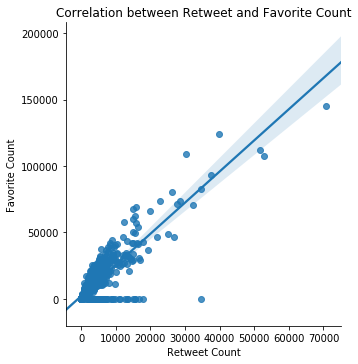

In [26]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.lmplot(x='retweet_count', y='favorite_count', data=master,fit_reg=True)
plt.xlabel("Retweet Count")
plt.ylabel("Favorite Count")
plt.title("Correlation between Retweet and Favorite Count");